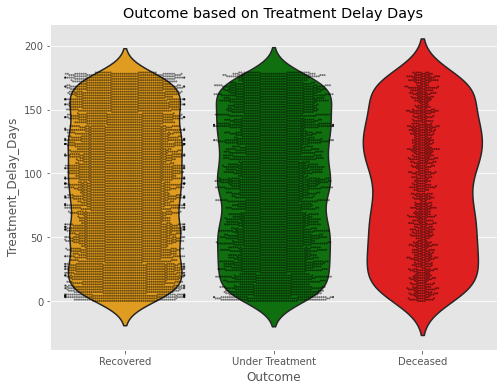

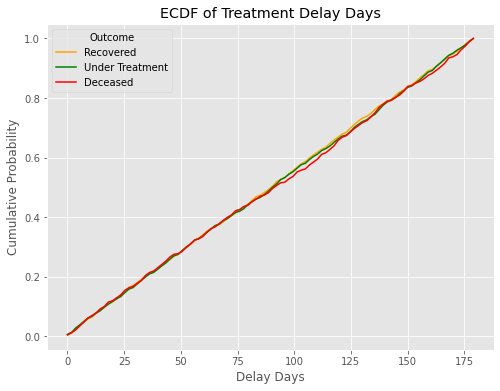

<Figure size 576x432 with 0 Axes>

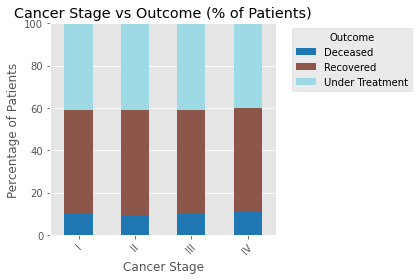

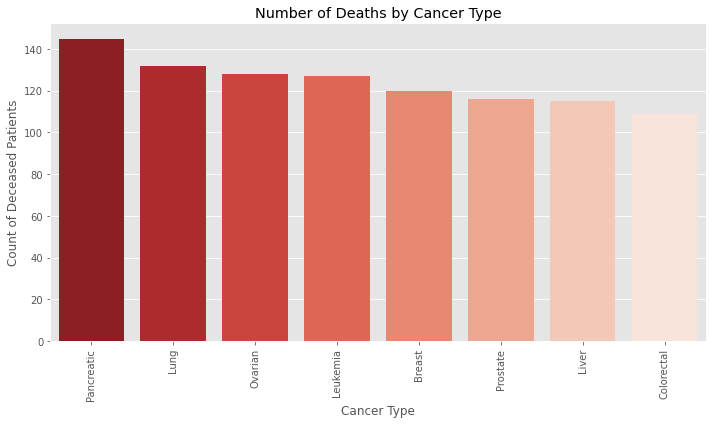

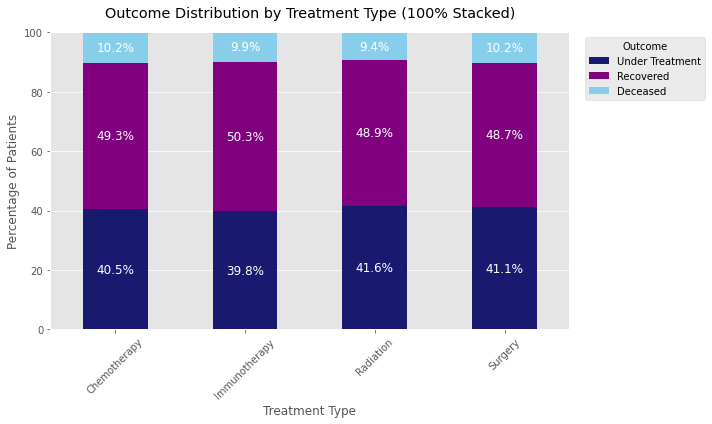

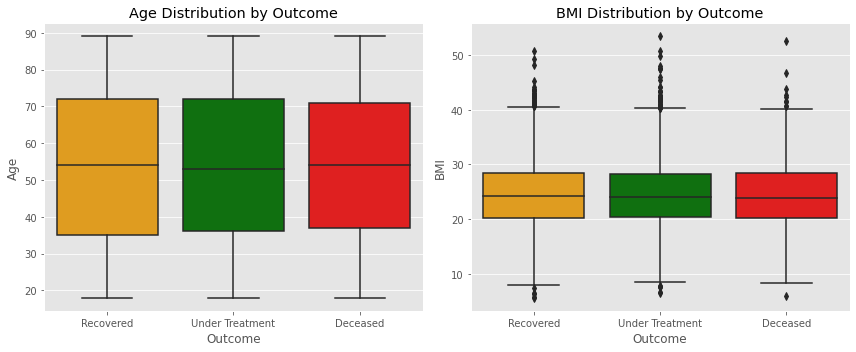

In [3]:
# Deeper Analysis and Visualization
# ==========================

# ==========================
#  Import Libraries
# ==========================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

# Plotting Settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)
%matplotlib inline
warnings.filterwarnings('ignore', message='Dataset has 0 variance; skipping density estimate')

# ==========================
#  Load and Manipulate Data
# ==========================

# Load Data
cancer_df = pd.read_csv(r'C:\Users\Admin\Desktop\Data Analysis\End-to-End Project\Cancer Patient Project\_cancer_dataset_uae.csv')

# Convert date columns to datetime
cancer_df['Diagnosis_Date'] = pd.to_datetime(cancer_df['Diagnosis_Date'], errors='coerce')
cancer_df['Treatment_Start_Date'] = pd.to_datetime(cancer_df['Treatment_Start_Date'], errors='coerce')


# Calculate Treatment Delay and BMI
cancer_df['Treatment_Delay_Days'] = (cancer_df['Treatment_Start_Date'] - cancer_df['Diagnosis_Date']).dt.days
cancer_df['BMI'] = cancer_df['Weight'] / ((cancer_df['Height'] / 100) ** 2)

 
# =============================
# Data Visualizations
# =============================

# 1 Treatment Delay vs Outcome - Violin and Swarm
plt.figure(figsize=(8,6))
sns.violinplot(x='Outcome', y='Treatment_Delay_Days', data=cancer_df, inner=None, palette=['orange','green','red'])
sns.swarmplot(x='Outcome', y='Treatment_Delay_Days', data=cancer_df, color='k', size=2, alpha=0.5)
plt.title('Outcome based on Treatment Delay Days')
plt.show()

# 2 ECDF of Treatment Delay Days
plt.figure(figsize=(8,6))
for outcome, color in zip(cancer_df['Outcome'].unique(), ['orange','green','red']):
    data = cancer_df[cancer_df['Outcome'] == outcome]['Treatment_Delay_Days'].dropna()
    ecdf = sm.distributions.ECDF(data)
    x = np.linspace(data.min(), data.max(), 100)
    plt.plot(x, ecdf(x), label=outcome, color=color)

plt.legend(title='Outcome')
plt.title('ECDF of Treatment Delay Days')
plt.xlabel('Delay Days')
plt.ylabel('Cumulative Probability')
plt.show()

# 3 Cancer Stage vs Outcome
ct_stage_pct = pd.crosstab(cancer_df['Cancer_Stage'], cancer_df['Outcome'], normalize='index') * 100

plt.figure(figsize=(8, 6))
ct_stage_pct.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Cancer Stage vs Outcome (% of Patients)')
plt.xlabel('Cancer Stage')
plt.ylabel('Percentage of Patients')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# 4 Mortality by Cancer Type
deceased = cancer_df[cancer_df['Outcome'] == 'Deceased']
mortality_counts = deceased['Cancer_Type'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=mortality_counts.index, y=mortality_counts.values, palette='Reds_r')
plt.title('Number of Deaths by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Count of Deceased Patients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5 Outcome Distribution by Treatment Type
ct_treat_pct = pd.crosstab(cancer_df['Treatment_Type'], cancer_df['Outcome'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Under Treatment':'MidnightBlue', 'Recovered':'Purple', 'Deceased':'Skyblue'}
order = ['Under Treatment', 'Recovered', 'Deceased']

ct_treat_pct[order].plot(kind='bar', stacked=True, color=[colors[o] for o in order], ax=ax)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_y() + height/2, f"{height:.1f}%", ha='center', va='center', color='white', fontsize=12)

ax.set_title('Outcome Distribution by Treatment Type (100% Stacked)', pad=15)
ax.set_xlabel('Treatment Type')
ax.set_ylabel('Percentage of Patients')
ax.set_ylim(0, 100)
ax.legend(title='Outcome', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6 Outcome Distribution by Age and BMI

plt.figure(figsize=(12,5))

# Age
plt.subplot(1,2,1)
sns.boxplot(x='Outcome', y='Age', data=cancer_df, palette=['orange','green','red'])
plt.title('Age Distribution by Outcome')

# BMI
plt.subplot(1,2,2)
sns.boxplot(x='Outcome', y='BMI', data=cancer_df, palette=['orange','green','red'])
plt.title('BMI Distribution by Outcome')

plt.tight_layout()
plt.show()